Thuật ngữ:

* _Gaussian đa chiều_: _Multivariate Gaussian Distribution_
* _Phân phối Gaussian đa chiều_: _Multivariate Gaussian Distribution_
* _Hàm mật độ xác suất_ : _probability density function_
* _Ma trận hiệp phương sai_: _Covariance matrix_
* _Hiệp phương sai_: _covariance_
* _Hàm hợp lý_: _likelihood function_
* _Phương pháp ước lượng hợp lý tối đa_: _Maximum Likelihood Estimation - MLE_

# 16. Gaussian Mixture Model

**Phân phối Gaussian**

Ở chương về [lý thuyết xác suất](https://phamdinhkhanh.github.io/deepai-book/ch_probability/appendix_probability.html#phan-phoi-chuan-gaussian-distribution) chúng ta đã được làm quen với phân phối Gaussian. Đây là một phân phối xác suất liên tục đối với một biến ngẫu nhiên thực có _hàm mật độ xác suất_ (_probability density function - pdf_) như sau:

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)$$

Một biến ngẫu nhiên $x$ tuân theo phân phối Gaussian được kí hiệu $x \sim N(\mu, \sigma^2)$ trong đó $\mu, \sigma$ là hai tham số đặc trưng của phân phối Gaussian. Phân phối Gaussian có hình dạng là một quả chuông mà giá trị xác suất lớn nhất tại $x = \mu$, hình dạng của phân phối đối xứng qua $\mu$.

![](https://imgur.com/S9IB3XM.png)

**Hình 1:** Hình dạng đường cong phân phối Gaussian với các cặp tham số $(\mu, \sigma^2)$ khác nhau. Source: [wikipedia]()

Đồng thời theo phương pháp ước lượng hợp lý tối đa [MLE](https://phamdinhkhanh.github.io/deepai-book/ch_ml/NaiveBayes.html#) ta cũng chứng minh được rằng $\hat{\mu} = \mathbb{E}(x)$ và $\hat{\sigma}^2 = \mathbb{Var}(x)$ là những ước lượng tham số phù hợp nhất đối với phân phối theo Gaussian của biến $x$ mà theo đó xác suất xảy ra của dữ liệu là lớn nhất.


Phân phối Gaussian là phân phối đối với dữ liệu một chiều. Trong trường hợp dữ liệu nhiều hơn một chiều thì chúng ta sẽ khái quát hoá phân phối Gaussian dưới dạng _phân phối Gaussian đa chiều_ (_Multivariate Gaussian Distribution_). Cụ thể là trong không gian $d$ chiều thì một biểu diễn _phân phối Gaussian đa chiều_ của véc tơ $\mathbf{x} = (x_1, x_2, \dots, x_d)$ được định nghĩa là:

$$f_{\mathbf{x}}(x_1, x_2, \dots, x_d) = \frac{1}{(2\pi)^{d/2}\sqrt{|\mathbf{\Sigma}|}} \exp{ \left( -\frac{1}{2}(\mathbf{x}-\mu)^{\intercal} \mathbf{\Sigma}^{-1}(\mathbf{x}-\mu) \right) }$$

Hoặc chúng ta cũng có thể viết:

$$N(\mathbf{x} | \mu, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{d/2}\sqrt{|\mathbf{\Sigma}|}} \exp{ \left( -\frac{1}{2}(\mathbf{x}-\mu)^{\intercal} \mathbf{\Sigma}^{-1}(\mathbf{x}-\mu) \right) }$$

Trong đó $\mu$ là véc tơ kì vọng theo các chiều của $\mathbf{x}$ và $\mathbf{\Sigma}$ là _ma trận hiệp phương sai_ (_covariance matrix_). _Ma trận hiệp phương sai_ của véc tơ ngẫu nhiên $\mathbf{x} = (x_1, x_2, \dots, x_d)$ có công thức như sau:

$$\mathbb{Cov}(\mathbf{x}) = \begin{bmatrix}
\mathbb{Cov}(x_1, x_1) & \mathbb{Cov}(x_1, x_2) & \dots & \mathbb{Cov}(x_1, x_d) \\
\mathbb{Cov}(x_2, x_1) & \mathbb{Cov}(x_2, x_2) & \dots & \mathbb{Cov}(x_2, x_d) \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{Cov}(x_d, x_1) & \mathbb{Cov}(x_d, x_2) & \dots & \mathbb{Cov}(x_d, x_d) \\
\end{bmatrix}$$

Ta dễ dàng nhận thấy ma trận hiệp phương sai là một ma trận vuông và đối xứng vì có $\mathbb{Cov}(x_i, x_j) = \mathbb{Cov}(x_j, x_i)$. Ngoài ra ma trận hiệp phương sai còn được biểu diễn dưới dạng tích _outer product_ của $\mathbf{x}$ theo công thức:

$$\mathbb{Cov}(\mathbf{x}) = \mathbb{E}[(\mathbf{x}-\mu)(\mathbf{x}-\mu)^{\intercal}]$$

Kí hiệu $|\mathbf{\Sigma}|$ là định thức của ma trận hiệp phương sai. Bên dưới là biểu diễn của phân phối _Bivariate Gaussian Distribution_ có các tham số lần lượt là: $\mu = (0, 0)$ và $\mathbf{\Sigma} = \begin{bmatrix} 1, 0 \\ 0, 1 \end{bmatrix}$.

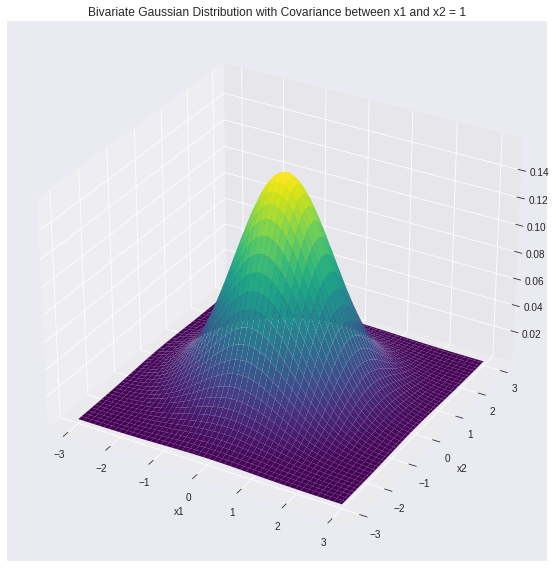

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=8,8
fig = plt.figure()

# Khởi tạo mean và covariance matrix
random_seed=1000
mean = np.array([0,0])
cov = np.array([[1, 0], [0, 1]])

# Khởi tạo multivariate gaussian distribution theo mean và covariance matrix
distr = multivariate_normal(cov = cov, mean = mean,
                            seed = random_seed)
  
# Tạo meshgrid complacent với 3-sigma boundary
mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = cov[0,0], cov[1,1]
  
x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)
  
# Khởi tạo density function cho mỗi điểm trong meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
  
# Vẽ biểu đồ
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution with Covariance between x1 and x2 = 1') 
plt.tight_layout()
plt.show()

**Hình 2**: _Phân phối Gaussian_ trong không gian hai chiều với các tham số $\mu = (0, 0)$ và $\mathbf{\Sigma} = \begin{bmatrix} 1, 0 \\ 0, 1 \end{bmatrix}$

```{toctree}
:hidden:
:titlesonly:


GMM.md
```